In [15]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig, multi_dot, inv, matrix_power, eigh, eigvalsh, eigvals
from scipy.optimize import curve_fit
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size']=20
from scipy.linalg import expm, sqrtm
from scipy.stats import linregress
from math import acos, factorial
import matplotlib.colors as colors
from scipy.special import eval_genlaguerre, gamma, hyp1f1, erf, erfc, erfi, dawsn
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [16]:
def SRE_x_st(G):
    return -np.log(1 - 4*(G**2-4)/G**4)/np.log(2)
def SRE_xy_st(G):
    return -np.log(1 - 4*(G**2-3)/G**4)/np.log(2)
def aR(G, d):
    return np.real(np.arctan(2/(d -1j*G)))
def aI(G, d):
    return np.imag(np.arctan(2/(d -1j*G)))
def om(G, d):
    return np.sqrt(1 - ((1j*d + G)**2/4.))
def SRE_det_st(G, d):
    #return -np.log((6 + np.cos(4*aR(G, d))+np.cosh(4*aI(G, d)))/(8*np.cosh(aI(G, d))**4))/np.log(2)
    oR = np.real(om(G, d))
    oI = np.imag(om(G, d))
    return -(np.log((128*((G - 2*oI)**4 + (d + 2*oR)**4 + (1 - (G - 2*oI)**2/4. - (d + 2*oR)**2/4.)**4 +(4 + (G - 2*oI)**2 + (d + 2*oR)**2)**4/256.))/(4 + (G - 2*oI)**2 + (d + 2*oR)**2)**4)/np.log(2))

In [17]:
σx = np.asarray([[0,1],[1,0]])
σy = np.asarray([[0,-1j],[1j,0]])
σz = np.asarray([[1,0],[0,-1]])
Pe = np.asarray([[0,0],[0,1]])
σp = np.asarray([[0,1],[0,0]])
σm = np.asarray([[0,0],[1,0]])
Id = np.asarray([[1,0],[0,1]])

In [18]:
def tildeSRE(psi):
    #l0 = eval2(g, G)
    #numer = (2*(4 - A(g,G)*l0 + l0**2)**4)/(16*l0**4 + (A(g,G) - l0)**4*l0**4 + (4 - A(g,G)*l0 + l0**2)**4)
    #return np.log(numer)/np.log(2)
    rx = np.conjugate(psi)@σx@psi
    ry =  np.conjugate(psi)@σy@psi
    rz =  np.conjugate(psi)@σz@psi
    return -np.log((1+rx**4+ry**4+rz**4)/(2))/np.log(2)

def evol_SRE_gen(Δ1, Γ1, Ω1x, Ω1y, psi0, t_arr):
    H = (Δ1 - 1j*Γ1)*Pe + Ω1x*σx+Ω1y*σy
    dt = t_arr[1]-t_arr[0]
    propdt = expm(-1j*H*dt)
    psi_t = np.zeros((2,len(t_arr)), dtype = complex)
    psi_t[:,0] = psi0
    SRE_t = np.zeros(len(t_arr))
    SRE_t[0] = tildeSRE(psi0)
    for n in range(1,len(t_arr)):
        psi_unnorm = propdt@psi_t[:,n-1]
        psi_t[:,n] = psi_unnorm/np.sqrt(np.sum(np.abs(psi_unnorm)**2))
        SRE_t[n] = tildeSRE(psi_t[:,n])
    return SRE_t

In [19]:
t_arr = np.linspace(0, 5, 500)
#psi0 = np.asarray([1,-1])/np.sqrt(2)
psi0 = np.asarray([1, 0])
SRE_x = evol_SRE_gen(0, np.sqrt(8), 1, 0, psi0, t_arr)
SRE_xy = evol_SRE_gen(0, np.sqrt(6), 1/np.sqrt(2), 1/np.sqrt(2), psi0, t_arr)
SRE_EPxy = evol_SRE_gen(0, 2, 1/np.sqrt(2), 1/np.sqrt(2), psi0, t_arr)
SRE_EPx = evol_SRE_gen(0, 2, 1, 0, psi0, t_arr)
SRE_PTux = evol_SRE_gen(0, 1, 1, 0, psi0, t_arr)
SRE_PTuxy = evol_SRE_gen(0, 1, 1/np.sqrt(2), 1/np.sqrt(2), psi0, t_arr)
SRE_Delta = evol_SRE_gen(1, np.sqrt(3), 1, 0, psi0, t_arr)

<ipython-input-18-142b3982755c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  SRE_t[0] = tildeSRE(psi0)
<ipython-input-18-142b3982755c>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  SRE_t[n] = tildeSRE(psi_t[:,n])


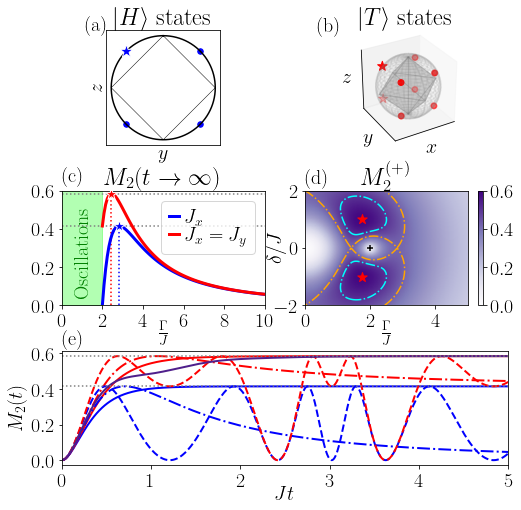

In [20]:
fig = plt.figure(figsize = [8, 8])
#cm = plt.get_cmap("Blues_r")
#cm = colors.LinearSegmentedColormap.from_list("", ["midnightblue","blue", "lightskyblue"])
ax = fig.add_subplot(3,2,1)
ax.plot([-1,0,1,0,-1],[0,1,0,-1,0], c = 'k', lw = .5, zorder = 20 )
y_arrH = [1,1,-1]/np.sqrt(2)
z_arrH = [1,-1,-1]/np.sqrt(2)
ax.scatter(y_arrH, z_arrH, c = 'b', s = 30)
ax.set_aspect('equal')
th = np.linspace(0, 2*np.pi, 300)
ax.plot(np.sin(th), np.cos(th), c = 'k')
ax.scatter(-1/np.sqrt(2), 1/np.sqrt(2), ec = 'w', marker='*', c = 'b', s = 200, zorder = 30)
ax0 = fig.add_subplot(3, 2, 2, projection='3d')
ax0.set_xlim(-1, 1)
ax0.set_ylim(-1,1)
#ax0.plot([-1,0,1,0,-1],[0,1,0,-1,0], c = 'k', lw = .5, zorder = 20 )
A_oct = [1, 0, 0]
B_oct = [0, 1, 0]
C_oct = [0, 0, 1]
D_oct = [-1, 0, 0]
E_oct = [0, -1, 0]
F_oct = [0, 0, -1]
#aux = np.asarray([A_oct, B_oct, C_oct, D_oct, E_oct, F_oct])
OCTO = [[E_oct, A_oct, B_oct],
        [E_oct, B_oct, D_oct],
        [E_oct, D_oct, C_oct],
        [E_oct, C_oct, A_oct],
        [F_oct, A_oct, B_oct],
        [F_oct, B_oct, D_oct],
        [F_oct, D_oct, C_oct],
        [F_oct, C_oct, A_oct],
]
ax0.add_collection3d (Poly3DCollection (OCTO, alpha = .2, color = 'gray'))
#OCTO = np.asarray(OCTO)
#ax0.plot(OCTO[:,0], OCTO[:,1], OCTO[:,2])
# sphere
u = np.linspace (0, np.pi, 30)
v = np.linspace (0, 2 * np.pi, 30)
x = np.outer (np.sin (u), np.sin (v))
y = np.outer (np.sin (u), np.cos (v))
z = np.outer (np.cos (u), np.ones_like (v))
ax0.plot_wireframe (x, y, z, alpha = 0.1, color = 'gray')
ax0.set_aspect("equal")
ax0.view_init(30, 60)
x_arr = [1, 1, -1, -1, -1, -1]/np.sqrt(3)
y_arr = [1, 1, 1, -1, 1, -1]/np.sqrt(3)
z_arr = [1, -1, 1, 1, -1, -1]/np.sqrt(3)
#ax0.scatter3D(x_st, y_st, z_st)
ax0.scatter3D(x_arr, y_arr, z_arr, marker = 'o', zorder = 100, c = 'r', linewidths = 1.5, s = 30)
ax0.scatter3D([1,1]/np.sqrt(3), [-1,-1]/np.sqrt(3), [1,-1]/np.sqrt(3), marker = '*', zorder = 100, c = 'r', s = 100)
#x = np.linspace(-np.pi, np.pi, 100)
#SDMstd = np.sqrt(1-y_st**2-z_st**2)/2
#ax0.plot(y_st+SDMstd*np.sin(x), z_st+SDMstd*np.cos(x))
ax1 = fig.add_subplot(3, 2, 3)
G_arr = np.linspace(2, 10, 100)
ax1.plot(G_arr, SRE_x_st(G_arr), c = 'b', lw = 3, zorder = 20, label = r'$J_x$')
ax1.plot(G_arr, SRE_xy_st(G_arr), c = 'r', lw = 3, zorder = 20, label = r'$J_x=J_y$')
ax1.set_title(r"$M_2(t\rightarrow \infty)$")
ax1.set_xlabel(r"$\Gamma/J$")
ax.set_xticks([])
ax.set_yticks([])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_zticks([])
ax0.set_xlabel(r"$x$", labelpad = -10)
ax0.set_ylabel(r"$y$", labelpad = -10)
ax0.set_zlabel(r"$z$", labelpad = -10)
plt.subplots_adjust(hspace = 0.4)
ax0.set_zlim(-1,1)
#cb.set_label(r"$t\Delta $")
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
ax1.set_xlim(0, G_arr[-1])
ax1.set_ylim(0,)
ax1.set_yticks([0, 0.2, 0.4, 0.6])
#ax1.set_xticks([0,1,2,3, 4])
ax1.set_ylim(0, 0.6)
ax.set_title(r"$|H\rangle$ states")
ax0.set_title(r"$|T\rangle$ states")
#ax1.vlines(2, 0, 0.6, color = 'gray', ls = '--')
ax1.text( 0.6, 0.05,"Oscillations", c='green', rotation = 90)
ax1.fill_between([0,2], [0.6, 0.6], color = 'lime', alpha = 0.3)
ax1.hlines(np.log(3/2)/np.log(2), 0, 10,  color = 'gray', ls = ':')
ax1.hlines(np.log(4/3)/np.log(2), 0, 10,  color = 'gray', ls = ':')
ax1.vlines(np.sqrt(8), 0, np.log(4/3)/np.log(2), color = 'b', ls = ':')
ax1.scatter(np.sqrt(8),np.log(4/3)/np.log(2), c = 'b', s = 150, marker = '*', ec = 'w', zorder = 30)
ax1.vlines(np.sqrt(6), 0, np.log(3/2)/np.log(2), color = 'r', ls = ':')
ax1.scatter(np.sqrt(6),np.log(3/2)/np.log(2), c = 'r', s = 150, marker = '*', ec = 'w', zorder = 30)
ax1.legend( labelspacing = 0, handlelength = 0.5, handletextpad = 0.3)
ax.set_xlabel("$y$", labelpad = 0)
#ax.text(1.2, -1.2, "$y$")
ax.set_ylabel("$z$", labelpad = 0)
ax2 = fig.add_subplot(3, 2, 4)
Gam = np.linspace(0, 5, 200)
det = np.linspace(-2, 2, 200)
GamM, detM = np.meshgrid(Gam, det)
p1 = ax2.pcolormesh(GamM, detM, SRE_det_st(GamM, detM), cmap = "Purples", shading = 'gouraud', rasterized = True, vmin = 0, vmax = 0.6)
ax2.contour(GamM, detM, SRE_det_st(GamM, detM), [np.log(4/3)/np.log(2), 0.5], colors = ['orange', 'cyan'], linestyles = '-.')
ax2.scatter( [np.sqrt(3), np.sqrt(3)],[-1, 1],c = 'r', s = 100, marker = '*')
ax2.scatter( 2, 0, marker = '+', c = 'k')
plt.colorbar(p1, ticks = [0, 0.2, 0.4, 0.6])
ax2.set_ylabel(r"$\delta/J$", labelpad = -12)
#ax2.text(-1.1, 0.5, r"$\Delta/J$", rotation = 90)
ax2.set_xlabel(r"$\frac{\Gamma}{J}$", labelpad = -10)
ax2.set_xticks([0, 2, 4])
ax1.set_xticks([0, 2, 4, 6, 8, 10])
ax1.set_xlabel(r"$\frac{\Gamma}{J}$", labelpad = -10)
ax2.set_title(r"$M_2^{(+)}$")
ax3 = fig.add_subplot(3, 2, (5, 6))
cmDet = plt.get_cmap("Purples")
cmx = plt.get_cmap("Blues")
cmxy = plt.get_cmap("Reds")
vPTu = 0.7
vEP = 0.8
vPTb = 0.9
ax3.plot(t_arr, SRE_x, c = 'b', lw = 2, label = 'x')
ax3.plot(t_arr, SRE_xy, c = 'r', lw = 2, label = 'y')
ax3.plot(t_arr, SRE_EPxy, c ='r', lw = 2, label = 'xyEP', ls = '-.')
ax3.plot(t_arr, SRE_EPx, c ='b', lw = 2, label = 'xEP', ls = '-.')
ax3.plot(t_arr, SRE_PTux, c = 'b', lw = 2, ls = '--', label = "xPTu")
ax3.plot(t_arr, SRE_PTuxy, c = 'r', lw = 2, ls = '--', label = "xyPTu")
ax3.plot(t_arr, SRE_Delta, c = cmDet(vPTb), lw =2, label = 'Det')
ax3.hlines(np.log(3/2)/np.log(2), 0, 10,  color = 'gray', ls = ':')
ax3.hlines(np.log(4/3)/np.log(2), 0, 10,  color = 'gray', ls = ':')
ax3.set_xlim(0, t_arr[-1])
ax3.set_ylabel("$M_2(t)$")
ax3.set_xlabel("$J t$", labelpad = -5)
ax3.set_yticks([0, 0.2, 0.4, 0.6])
ax.text(-1.5, 1.1, "(a)")
ax0.text(2.8, 0, 2.5, "(b)")
ax1.text(0, 0.65, "(c)")
ax2.text(0, 2.25, "(d)")
ax3.text(0, 0.65, "(e)")
#ax2.set_xscale('log')
#plt.savefig("SDQxy_ST_evolM2_PTb.pdf", bbox_inches = 'tight' )
plt.savefig("DQ_magicIllustration.pdf", bbox_inches = 'tight' )
plt.show()